In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [4]:
train_data = datasets.MNIST(
    root ='data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root ='data',
    train = False,
    transform = ToTensor(),
    download = True
)

100%|███████████████████████████████████| 9912422/9912422 [00:00<00:00, 31405508.42it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|███████████████████████████████████████| 28881/28881 [00:00<00:00, 16578033.92it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|███████████████████████████████████| 1648877/1648877 [00:00<00:00, 11760380.02it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████████████████████████████████████| 4542/4542 [00:00<00:00, 3284573.93it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [10]:
test_data.data.size()

torch.Size([10000, 28, 28])

In [12]:
train_data.targets.size()

torch.Size([60000])

In [13]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1),
    'test' : DataLoader(test_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1)
}

In [15]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x128854a00>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x128854be0>}

In [51]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    
    def __init__(self):
        super(CNN,self).__init__()
        
        self.conv1 = nn.Conv2d(1,10,kernel_size =5)
        self.conv2 = nn.Conv2d(10,20,kernel_size =5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training = self.training)
        x = self.fc2(x)
        
        return F.softmax(x)
                   
                   

In [54]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr = 0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx,(data,target) in enumerate(loaders['train']):
        data,target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 ==0:
            print(f'Train Epoch:{epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

        
def test():
    model.eval()
    
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data,target in loaders['test']:
            data,target = data.to(device),target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim =True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= len(loaders['test'].dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f},Accuracy {correct}/{len(loaders['test'].dataset)}({100. * correct / len(loaders['test'].dataset):.0f}%\n)")

  

In [55]:
for epoch in range(1,11):
    train(epoch)
    test()

/var/folders/h2/tk0r6fvd1f71h1y8csf96jwh0000gn/T/ipykernel_26756/1058559663.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch:1 [0/60000 (0%)]	2.303375
Train Epoch:1 [2000/60000 (3%)]	2.282820
Train Epoch:1 [4000/60000 (7%)]	2.193603
Train Epoch:1 [6000/60000 (10%)]	2.017380
Train Epoch:1 [8000/60000 (13%)]	1.916216
Train Epoch:1 [10000/60000 (17%)]	1.910362
Train Epoch:1 [12000/60000 (20%)]	1.818761
Train Epoch:1 [14000/60000 (23%)]	1.810746
Train Epoch:1 [16000/60000 (27%)]	1.853907
Train Epoch:1 [18000/60000 (30%)]	1.862964
Train Epoch:1 [20000/60000 (33%)]	1.777834
Train Epoch:1 [22000/60000 (37%)]	1.833195
Train Epoch:1 [24000/60000 (40%)]	1.735455
Train Epoch:1 [26000/60000 (43%)]	1.717127
Train Epoch:1 [28000/60000 (47%)]	1.741834
Train Epoch:1 [30000/60000 (50%)]	1.752369
Train Epoch:1 [32000/60000 (53%)]	1.761633
Train Epoch:1 [34000/60000 (57%)]	1.729074
Train Epoch:1 [36000/60000 (60%)]	1.748256
Train Epoch:1 [38000/60000 (63%)]	1.782771
Train Epoch:1 [40000/60000 (67%)]	1.799712
Train Epoch:1 [42000/60000 (70%)]	1.790928
Train Epoch:1 [44000/60000 (73%)]	1.712129
Train Epoch:1 [46000/6

Train Epoch:7 [10000/60000 (17%)]	1.531821
Train Epoch:7 [12000/60000 (20%)]	1.507047
Train Epoch:7 [14000/60000 (23%)]	1.506292
Train Epoch:7 [16000/60000 (27%)]	1.525212
Train Epoch:7 [18000/60000 (30%)]	1.522358
Train Epoch:7 [20000/60000 (33%)]	1.548882
Train Epoch:7 [22000/60000 (37%)]	1.527804
Train Epoch:7 [24000/60000 (40%)]	1.495949
Train Epoch:7 [26000/60000 (43%)]	1.513958
Train Epoch:7 [28000/60000 (47%)]	1.551544
Train Epoch:7 [30000/60000 (50%)]	1.502524
Train Epoch:7 [32000/60000 (53%)]	1.497731
Train Epoch:7 [34000/60000 (57%)]	1.502503
Train Epoch:7 [36000/60000 (60%)]	1.497887
Train Epoch:7 [38000/60000 (63%)]	1.520208
Train Epoch:7 [40000/60000 (67%)]	1.559926
Train Epoch:7 [42000/60000 (70%)]	1.522344
Train Epoch:7 [44000/60000 (73%)]	1.560089
Train Epoch:7 [46000/60000 (77%)]	1.536071
Train Epoch:7 [48000/60000 (80%)]	1.515557
Train Epoch:7 [50000/60000 (83%)]	1.524072
Train Epoch:7 [52000/60000 (87%)]	1.505010
Train Epoch:7 [54000/60000 (90%)]	1.526744
Train Epoch

In [56]:
device

device(type='cpu')

Prediction:9


/var/folders/h2/tk0r6fvd1f71h1y8csf96jwh0000gn/T/ipykernel_26756/1058559663.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


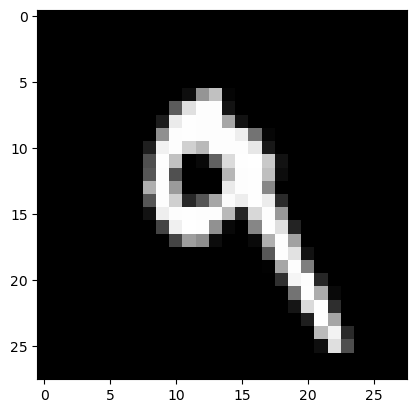

In [61]:
import matplotlib.pyplot as plt

model.eval()

data,target = test_data[7]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1,keepdim =True).item()

print(f'Prediction:{prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image,cmap ='gray')
plt.show()